<a href="https://colab.research.google.com/github/jfcaro/Calidad-Aire-Madrid/blob/master/Calidad_Aire_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calidad del Aire en Madrid

Análisis Calidad de Aire en Madrid

fuente: https://bit.ly/2WiTqaT

descripcion: https://bit.ly/2ygKM4W

@jfrcaro

In [0]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Descargar los datos 

! wget https://datos.madrid.es/egob/catalogo/201200-10306316-calidad-aire-horario.zip


--2020-05-14 17:09:36--  https://datos.madrid.es/egob/catalogo/201200-10306316-calidad-aire-horario.zip
Resolving datos.madrid.es (datos.madrid.es)... 149.235.17.74
Connecting to datos.madrid.es (datos.madrid.es)|149.235.17.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://datos.madrid.es:443/egobfiles/MANUAL/201200/Anio202004.zip [following]
--2020-05-14 17:09:38--  https://datos.madrid.es/egobfiles/MANUAL/201200/Anio202004.zip
Connecting to datos.madrid.es (datos.madrid.es)|149.235.17.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2360067 (2.2M) [application/zip]
Saving to: ‘201200-10306316-calidad-aire-horario.zip’

201200-10306316-cal 100%[===================>]   2.25M   252KB/s    in 10s     

2020-05-14 17:09:49 (229 KB/s) - ‘201200-10306316-calidad-aire-horario.zip’ saved [2360067/2360067]



In [3]:
# Mostrar fichero y descomprimir 

!ls
!unzip 201200-10306316-calidad-aire-horario.zip 

201200-10306316-calidad-aire-horario.zip  sample_data
Archive:  201200-10306316-calidad-aire-horario.zip
  inflating: feb_mo20.csv            
  inflating: feb_mo20.txt            
  inflating: feb_mo20.xml            
  inflating: mar_mo20.csv            
  inflating: mar_mo20.txt            
  inflating: mar_mo20.xml            
  inflating: abr_mo20.csv            
  inflating: abr_mo20.txt            
  inflating: abr_mo20.xml            
  inflating: ene_mo20.csv            
  inflating: ene_mo20.txt            
  inflating: ene_mo20.xml            


In [0]:
# Diccionarios
# lectura = dataframe por mes 
# meses = meses y código de fichero a descargar
# medidas = catalogo de magnitudes y unidades

lectura={}
meses = { 'Enero':'ene_mo20.csv', 'Febrero':'feb_mo20.csv', 'Marzo':'mar_mo20.csv', 'Abril':'abr_mo20.csv'}
medidas = { 1:("Dióxido de Azufre","µg/m3"), 6:("Monóxido de Carbono","mg/m3"), 7:("Monóxido de Nitrógeno","µg/m3"), 8:("Dióxido de Nitrógeno","µg/m 3") , 9:("PM2.5","µg/m3"), 10:("PM10","µg/m3"), 12:("Óxidos de Nitrógeno","µg/m3"), 14:("Ozono","µg/m3"), 20:("Tolueno","µg/m3"), 30:("Benceno","µg/m3"), 35:("Etilbenceno","µg/m3"), 42:("Hidrocarburos totales (hexano)","mg/m3"), 43:("Metano","mg/m3"), 44:("Hidrocarburos no metánicos (hexano)", "mg/m3") }


In [0]:
# Lee los datos (un fichero por mes) 
for mes in meses:
    lectura[mes] =pd.read_csv('/content/' + str(meses[mes]), sep =';')

In [6]:
# Analisis dataframe
lectura['Enero'].describe()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,4693.0,4693.0,4693.000000,4693.000000,4693.0,4693.0,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000
mean,28.0,79.0,35.187300,13.162369,2020.0,1.0,15.917963,37.681592,30.417479,25.123390,21.520119,19.629736,19.753397,23.730017,32.753441,41.662687,44.445821,36.956194,35.087202,33.813991,32.604473,30.961268,28.953561,27.973731,31.029968,39.961931,48.534029,52.879214,51.414230,47.509966,42.344822
std,0.0,0.0,17.822227,10.478109,0.0,0.0,8.944551,70.400945,56.092988,44.367576,36.275264,31.323154,30.602511,37.967890,54.667965,74.660698,113.880888,60.982837,54.762905,50.031603,46.580537,43.293515,38.414704,37.842520,44.641565,65.676719,90.158114,101.052279,96.376369,88.987254,81.109438
min,28.0,79.0,4.000000,1.000000,2020.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.0,79.0,18.000000,7.000000,2020.0,1.0,8.000000,1.390000,1.210000,1.090000,1.000000,1.000000,1.000000,1.230000,1.400000,1.600000,2.000000,2.000000,2.040000,2.300000,2.000000,2.000000,2.000000,2.000000,1.870000,1.600000,1.650000,1.800000,1.800000,1.670000,1.480000
50%,28.0,79.0,38.000000,10.000000,2020.0,1.0,16.000000,10.000000,8.000000,7.000000,6.000000,6.000000,7.000000,9.000000,12.000000,14.000000,15.490000,16.000000,17.000000,17.000000,17.000000,16.000000,15.000000,14.000000,14.000000,15.000000,16.000000,16.000000,15.000000,14.000000,11.000000
75%,28.0,79.0,54.000000,14.000000,2020.0,1.0,24.000000,45.000000,39.000000,34.000000,29.580000,27.000000,28.000000,33.000000,42.000000,50.000000,51.000000,47.000000,45.000000,45.000000,45.000000,44.030000,42.000000,40.010000,43.850000,51.000000,58.000000,60.000000,58.000000,52.000000,47.340000
max,28.0,79.0,60.000000,44.000000,2020.0,1.0,31.000000,769.000000,794.000000,593.000000,546.000000,520.000000,443.000000,438.000000,667.000000,1115.000000,4249.000000,913.700000,541.000000,490.000000,460.000000,674.000000,390.000000,374.000000,429.000000,824.000000,1366.000000,1234.000000,1113.000000,926.000000,936.000000


In [7]:
# Primeros datos del dataframe
lectura['Enero'].head(5)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2020,1,1,7.0,V,8.0,V,9.0,V,8.0,V,6.0,V,6.0,V,5.0,V,5.0,V,4.0,V,5.0,V,6.0,V,8.0,V,13.0,V,14.0,V,13.0,V,12.0,V,11.0,V,10.0,V,10.0,V,12.0,V,14.0,V,12.0,V,11.0,V,9.0,V
1,28,79,4,1,28079004_1_38,2020,1,2,8.0,V,8.0,V,7.0,V,6.0,V,5.0,V,5.0,V,5.0,V,9.0,V,10.0,V,9.0,V,8.0,V,12.0,V,16.0,V,16.0,V,14.0,V,12.0,V,11.0,V,10.0,V,11.0,V,14.0,V,14.0,V,15.0,V,12.0,V,10.0,V
2,28,79,4,1,28079004_1_38,2020,1,3,9.0,V,8.0,V,7.0,V,7.0,V,6.0,V,6.0,V,6.0,V,9.0,V,9.0,V,9.0,V,9.0,V,10.0,V,10.0,V,9.0,V,9.0,V,10.0,V,11.0,V,12.0,V,12.0,V,12.0,V,13.0,V,13.0,V,10.0,V,8.0,V
3,28,79,4,1,28079004_1_38,2020,1,4,7.0,V,5.0,V,6.0,V,5.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,5.0,V,6.0,V,6.0,V,7.0,V,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V,10.0,V,10.0,V,11.0,V,10.0,V,8.0,V,9.0,V
4,28,79,4,1,28079004_1_38,2020,1,5,8.0,V,6.0,V,5.0,V,4.0,V,3.0,V,3.0,V,3.0,V,3.0,V,4.0,V,4.0,V,5.0,V,7.0,V,11.0,V,14.0,V,14.0,V,11.0,V,11.0,V,11.0,V,11.0,V,12.0,V,14.0,V,13.0,V,11.0,V,9.0,V


In [0]:
# Función que obtiene la media horaria de cada medida por mes

def datos (mes,magnitud):
    return lectura[mes][lectura[mes]['MAGNITUD']==magnitud][['H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24' ]].mean().to_numpy()


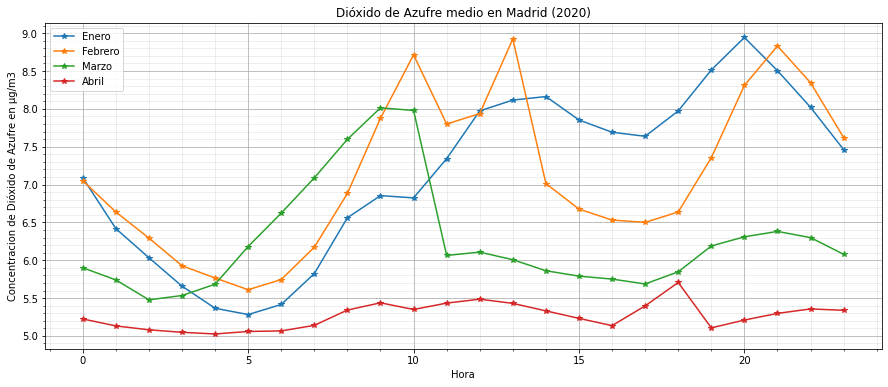

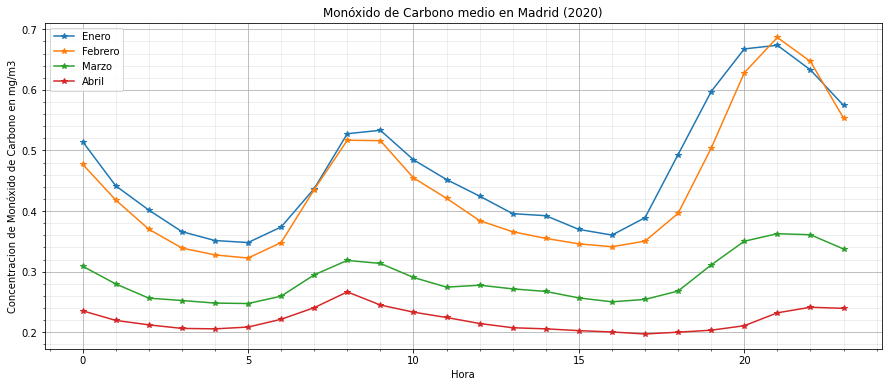

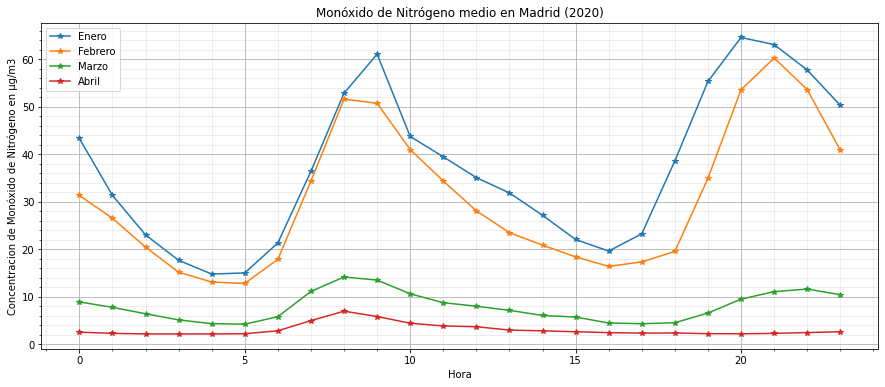

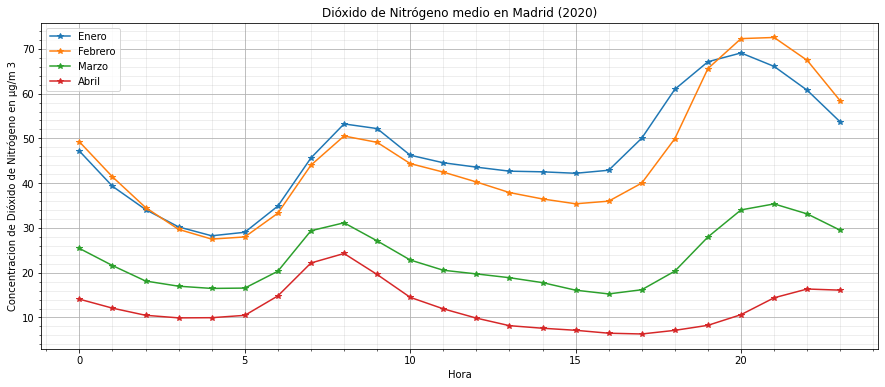

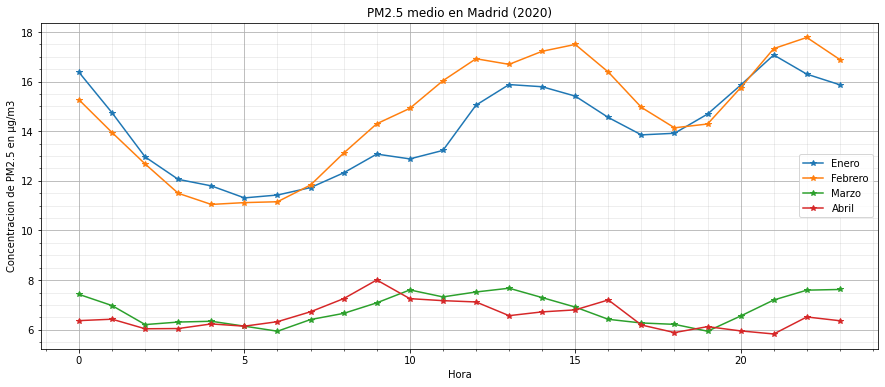

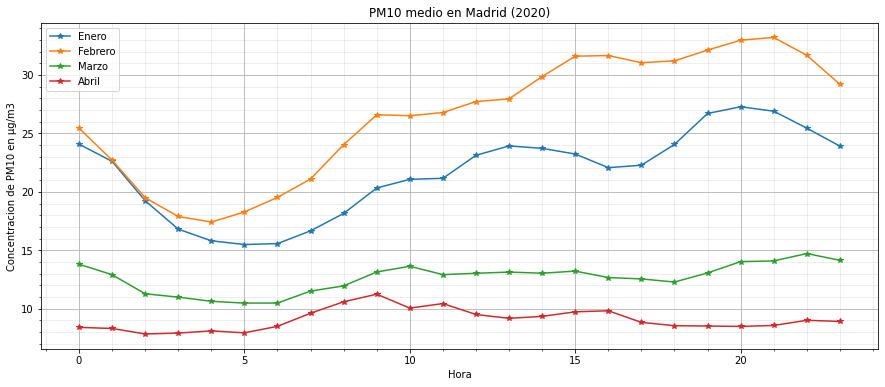

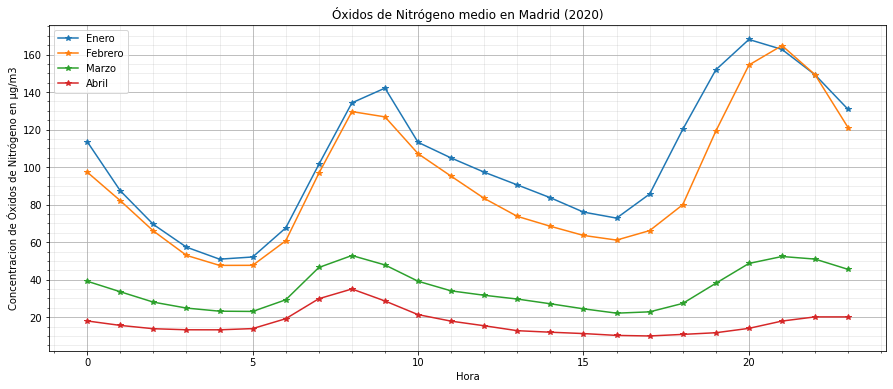

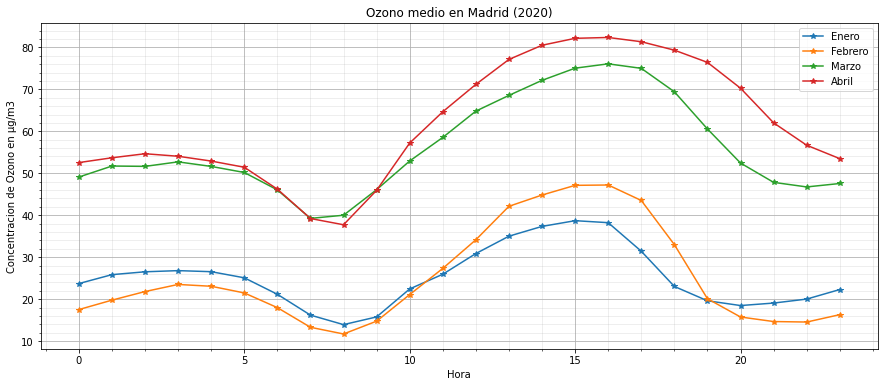

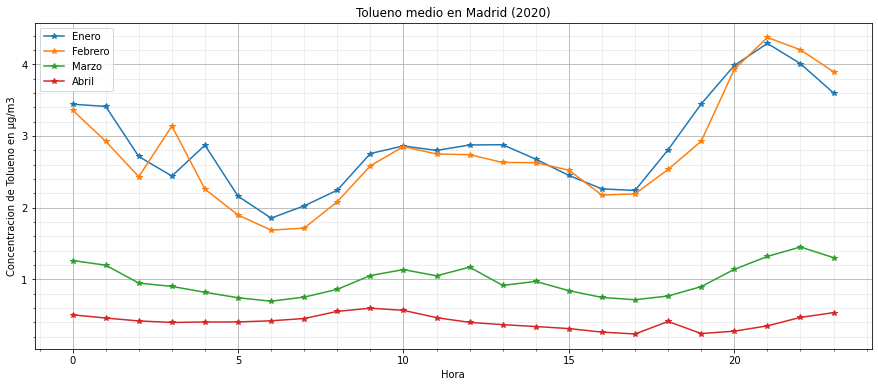

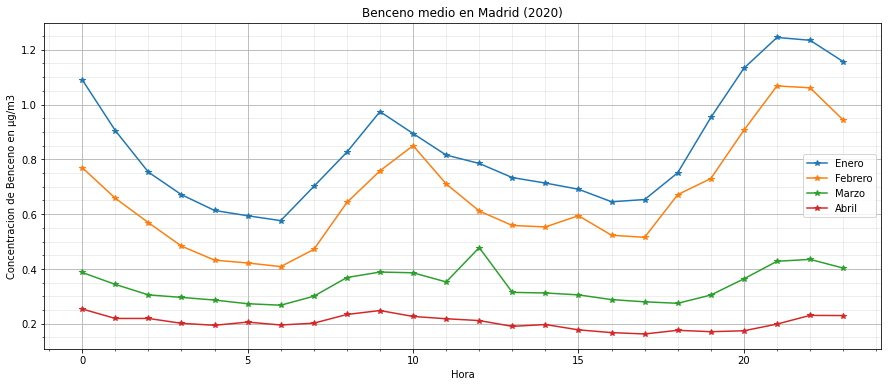

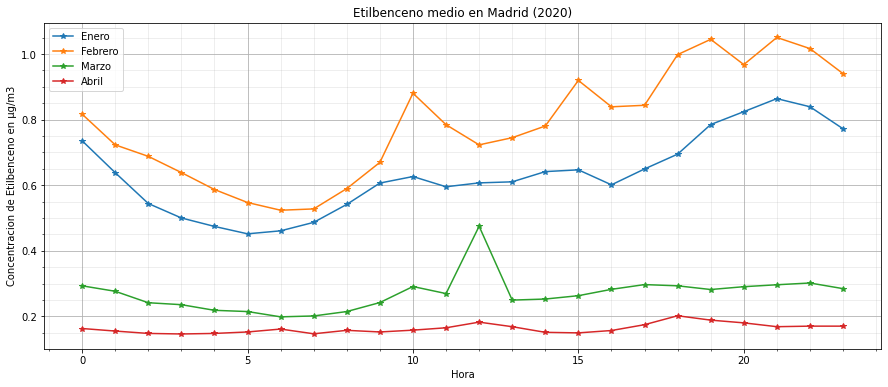

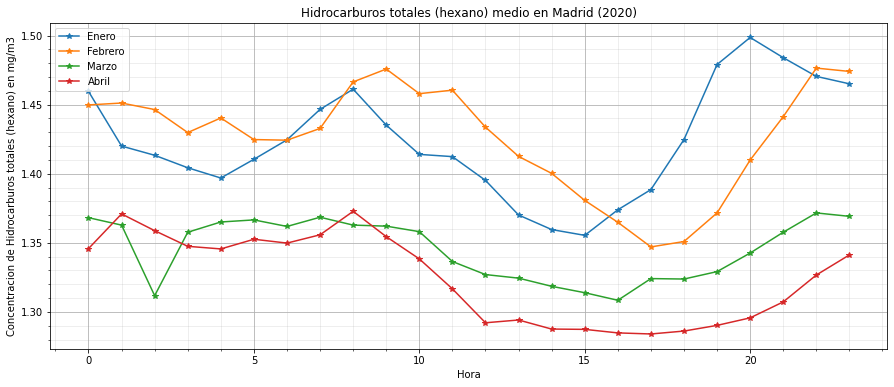

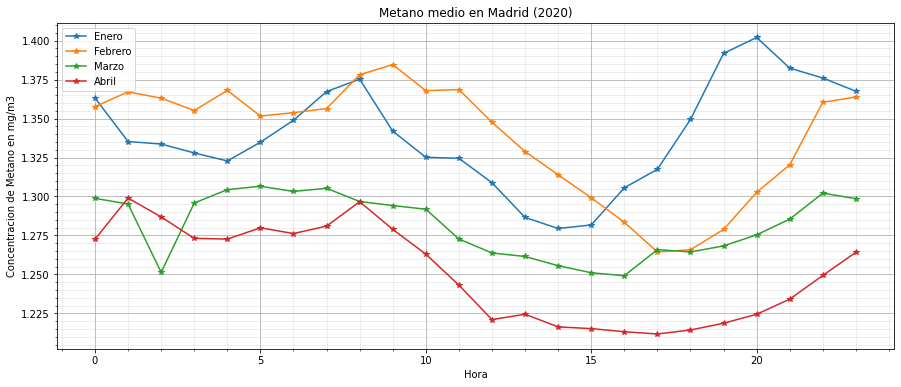

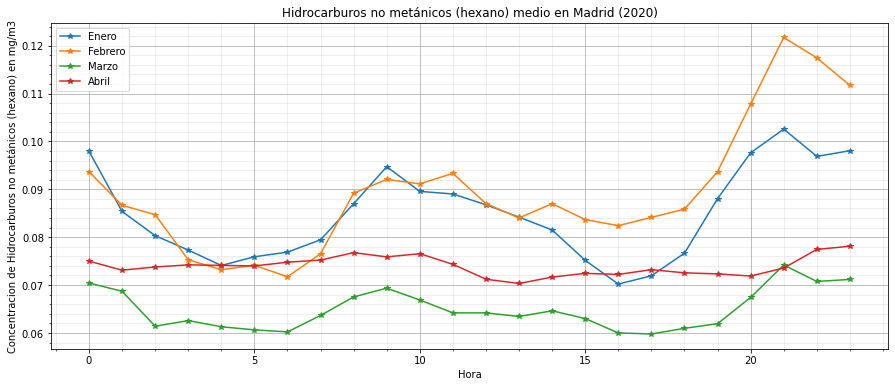

In [11]:
# Representación datos recorriendo diccionario de magnitudes y meses

for medida in medidas: 
  plt.figure(figsize=(15,6))
  for mes in meses:   
    plt.plot(datos(mes, medida), marker ='*', label =mes)
  plt.title(str(medidas[medida][0])+" medio en Madrid (2020)")
  plt.xlabel("Hora")
  plt.ylabel("Concentracion de "+str(medidas[medida][0])+ " en " +str(medidas[medida][1]))
  plt.legend() 
  plt.grid(b=True, which='major')
  plt.minorticks_on()
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
  plt.show()
